# **Car Value Prediction Model**

## **Introduction**

Rusty Bargain (not a real company) is a used car trading company that is developing an application to attract new buyers. This application will allow users to quickly determine the market value of their cars. Users will have access to historical data, vehicle technical specifications, model versions, and car prices. The goal of this project is to develop a model capable of determining the market value of cars.

### **Goals**

Rusty Bargain is particularly interested in:
1. **Prediction quality**
2. **Prediction speed**
3. **Training time of the model**


### **Steps**

1. **Data Observation and Storage**: Begin by saving and observing the provided dataset.
2. **Model Training**: Train different models with various hyperparameters. At least two distinct models should be created, but more are preferable. Note that different implementations of gradient boosting do not count as separate models. The primary objective of this step is to compare gradient boosting methods with random forest, decision tree, and linear regression.
3. **Model Analysis**: Analyze the speed and quality of each model.

### **Data Description**

#### Features
- **DateCrawled**: The date when the profile was downloaded from the database
- **VehicleType**: The body type of the vehicle
- **RegistrationYear**: The year the vehicle was registered
- **Gearbox**: The type of transmission
- **Power**: Power in horsepower (hp)
- **Model**: The model of the vehicle
- **Mileage**: Distance traveled (measured in km according to a specific regional dataset)
- **RegistrationMonth**: The month the vehicle was registered
- **FuelType**: The type of fuel used
- **Brand**: The brand of the vehicle
- **NotRepaired**: Indicates if the vehicle has been previously repaired
- **DateCreated**: The date the profile was created
- **NumberOfPictures**: The number of pictures of the vehicle
- **PostalCode**: The postal code of the profile owner (user)
- **LastSeen**: The date of the user's last activity

#### Target
- **Price**: The price of the vehicle (in Euros)

## **Data Loadment & Exploratory**

In [1]:
!pip install catboost

In [2]:
# Libraries for data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

# Import Library for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xg

# Import Library for model evaluation
from sklearn.metrics import confusion_matrix, roc_auc_score

### **Data Loadment**

In [3]:
#load data
path = '/content/car_data.csv'

In [4]:
df = pd.read_csv(path)
df.head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47


### **Data Checking**

In [5]:
# Understand the number of columns and rows

df.shape

(354369, 16)

In [6]:
# Understand the general information regarding the columns content

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [7]:
# Check missing value

df.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [8]:
# Check duplicated value

df.duplicated().sum()

262

In [9]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354107 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354107 non-null  object
 1   Price              354107 non-null  int64 
 2   VehicleType        316623 non-null  object
 3   RegistrationYear   354107 non-null  int64 
 4   Gearbox            334277 non-null  object
 5   Power              354107 non-null  int64 
 6   Model              334406 non-null  object
 7   Mileage            354107 non-null  int64 
 8   RegistrationMonth  354107 non-null  int64 
 9   FuelType           321218 non-null  object
 10  Brand              354107 non-null  object
 11  NotRepaired        282962 non-null  object
 12  DateCreated        354107 non-null  object
 13  NumberOfPictures   354107 non-null  int64 
 14  PostalCode         354107 non-null  int64 
 15  LastSeen           354107 non-null  object
dtypes: int64(7), object(9)
me

### **Exploratory Data Analysis**

In [10]:
# Check the correlation
# Select relevant columns for correlation
columns_of_interest = ['Price', 'RegistrationYear', 'Power', 'Mileage', 'RegistrationMonth', 'NumberOfPictures', 'PostalCode']
df_selected = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Display the correlation matrix
correlation_matrix

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026907,0.158831,-0.333144,0.110605,NaN,0.076034
RegistrationYear,0.026907,1.000000,-0.000828,-0.053450,-0.011624,NaN,-0.003458
Power,0.158831,-0.000828,1.000000,0.023993,0.043370,NaN,0.021657
Mileage,-0.333144,-0.053450,0.023993,1.000000,0.009627,NaN,-0.007675
RegistrationMonth,0.110605,-0.011624,0.043370,0.009627,1.000000,NaN,0.014063
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076034,-0.003458,0.021657,-0.007675,0.014063,NaN,1.000000


In [11]:
df_eda = df.copy()
df_eda.head(2)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46


In [12]:
df_eda['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [13]:
df_eda_1 = df_eda.pivot_table(index='VehicleType', values='Price', aggfunc='count', dropna=False).reset_index()
df_eda_1.columns = ['VehicleType', 'Qty']
df_eda_1 = df_eda_1.sort_values(by='Qty', ascending=False)
df_eda_1

,VehicleType,Qty
4,sedan,91399
5,small,79753
7,wagon,65115
0,bus,28752
1,convertible,20180
2,coupe,16147
6,suv,11991
3,other,3286


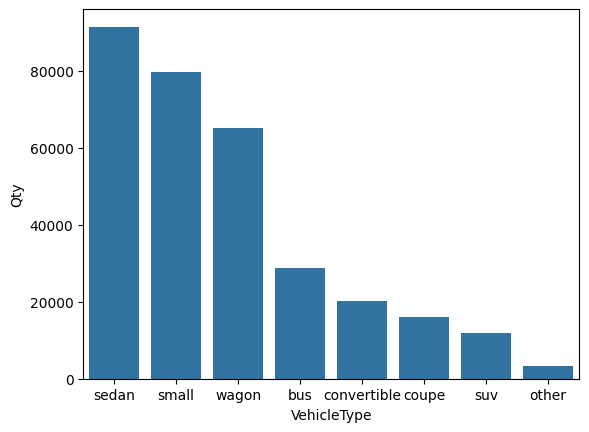

In [14]:
sns.barplot(data= df_eda_1, x='VehicleType', y='Qty')
plt.show()

In [15]:
df_eda_2 = df_eda.pivot_table(index='FuelType', values='Price', aggfunc='count', dropna=False).reset_index()
df_eda_2.columns = ['FuelType', 'Qty']
df_eda_2 = df_eda_2.sort_values(by='Qty', ascending=False)
df_eda_2

,FuelType,Qty
6,petrol,216161
2,gasoline,98658
4,lpg,5307
0,cng,565
3,hybrid,233
5,other,204
1,electric,90


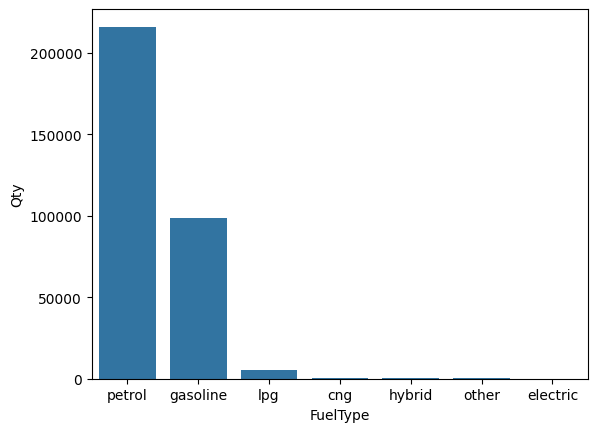

In [16]:
sns.barplot(data= df_eda_2, x='FuelType', y='Qty')
plt.show()

In [17]:
df_eda_3 = df_eda.pivot_table(index='Model', values='Price', aggfunc='count').reset_index()
df_eda_3.columns = ['Model', 'Qty']
df_eda_3 = df_eda_3.sort_values(by='Qty', ascending=False).head(10)
df_eda_3

,Model,Qty
116,golf,29215
166,other,24402
11,3er,19744
173,polo,13057
83,corsa,12559
42,astra,10800
170,passat,10137
29,a4,9894
59,c_klasse,8307
15,5er,7861


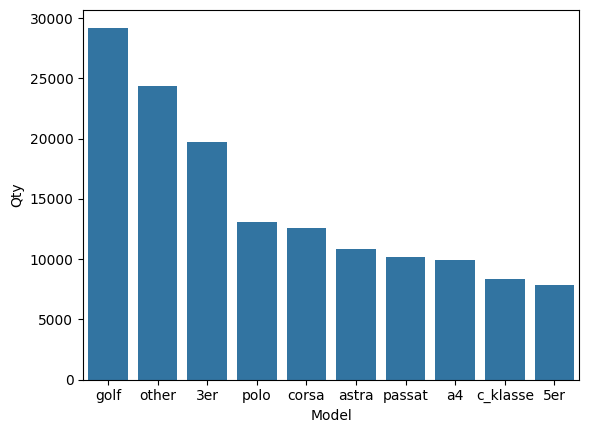

In [18]:
sns.barplot(data= df_eda_3, x='Model', y='Qty')
plt.show()

In [19]:
df_eda_4 = df_eda.pivot_table(index='Gearbox', values='Price', aggfunc='count', dropna=False).reset_index()
df_eda_4.columns = ['Gearbox', 'Qty']
df_eda_4 = df_eda_4.sort_values(by='Qty', ascending=False).head(10)
df_eda_4

,Gearbox,Qty
1,manual,268034
0,auto,66243


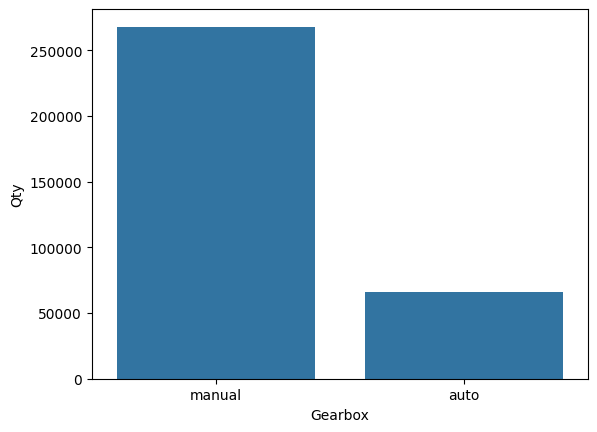

In [20]:
sns.barplot(data= df_eda_4, x='Gearbox', y='Qty')
plt.show()

In [21]:
df_eda_5 = df_eda.pivot_table(index='NotRepaired', values='Price', aggfunc='count').reset_index()
df_eda_5.columns = ['NotRepaired', 'Qty']
df_eda_5 = df_eda_5.sort_values(by='Qty', ascending=False).head(10)
df_eda_5

,NotRepaired,Qty
0,no,246927
1,yes,36035


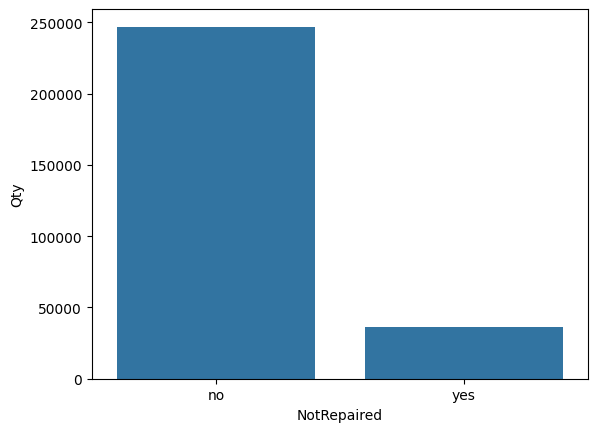

In [22]:
sns.barplot(data= df_eda_5, x='NotRepaired', y='Qty')
plt.show()

In [23]:
# Drop the missing value in dataset
df = df.dropna(subset=['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired'])
df.isnull().sum()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64

### **Summary**

1. The data has 27077 rows and 16 columns.
2. Missing value was found in columns VehicleType with 2933 rows, Gearbox with 1505 rows, Model with 1474 rows, FuelType with 2570 rows, and NotRepaired with 5453 rows, and all of the missing value has been removed.
3. 1 duplicated data was found and has been removed.
4. Top 3 vehicle types are sedan, small, and wagon.
5. Top 3 fuel types are petrol, gasoline, and lpg.
6. Top 3 model types are golf, other type of vehicle, and 3er.

## **Developping Machine Learning Model**

In [24]:
# OHE
column_to_del = ['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode', 'NumberOfPictures', 'RegistrationMonth']
df = df.drop(column_to_del, axis=1)

In [25]:
df_ohe = pd.get_dummies(df)
df_ohe = df_ohe.sample(15000)
df_ohe.shape

(15000, 311)

In [26]:
# Split the data into train dataset and test dataset
df_ohe_train_valid, df_ohe_test = train_test_split(df_ohe, test_size=0.15, random_state=12345)
df_ohe_train, df_ohe_valid = train_test_split(df_ohe_train_valid, test_size=0.25, random_state=12345)

print(df_ohe_train.shape)
print(df_ohe_test.shape)
print(df_ohe_valid.shape)

(9562, 311)
(2250, 311)
(3188, 311)


In [27]:
# RMSE Calculation function
def rmse(y, predictions):
    return mean_squared_error(y, predictions)**0.5

In [28]:
# State the target and features
X_train = df_ohe_train.drop(['Price'], axis=1)
y_train = df_ohe_train['Price']

X_test = df_ohe_test.drop(['Price'], axis=1)
y_test = df_ohe_test['Price']

X_valid = df_ohe_valid.drop(['Price'], axis=1)
y_valid = df_ohe_valid['Price']

print('Train dataset')
print(X_train.shape)
print(y_train.shape)
print('Test dataset')
print(X_test.shape)
print(y_test.shape)
print('Valid dataset')
print(X_valid.shape)
print(y_valid.shape)

Train dataset
(9562, 310)
(9562,)
Test dataset
(2250, 310)
(2250,)
Valid dataset
(3188, 310)
(3188,)


### **Logistic Regression**

In [29]:
%%time

# Create logistic regression model
lr = LogisticRegression(max_iter=200)
# Training Model
lr.fit(X_train, y_train)

CPU times: user 3min 28s, sys: 1min 4s, total: 4min 32s
Wall time: 3min 6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [30]:
%%time

# Training prediction
X_train_pred_lr = lr.predict(X_train)
X_test_pred_lr = lr.predict(X_test)
X_valid_pred_lr = lr.predict(X_valid)

CPU times: user 657 ms, sys: 239 ms, total: 896 ms
Wall time: 481 ms


In [31]:
%%time

# Calculate RMSE values and round them to 3 decimal places
rmse_train_lr = rmse(y_train, X_train_pred_lr).round(3)
rmse_test_lr = rmse(y_test, X_test_pred_lr).round(3)
rmse_valid_lr = rmse(y_valid, X_valid_pred_lr).round(3)

# Store the wall time manually from the %%time output after running the cell
wall_time = (3 * 60) + 21

# Create a DataFrame to display the RMSE and prediction time results
results_lr = pd.DataFrame({
    'model': ['Logistic Regression'],
    'rmse_train': [rmse_train_lr],
    'rmse_test': [rmse_test_lr],
    'rmse_valid': [rmse_valid_lr],
    'wall_time_sec': [wall_time]
})

# Print the DataFrame
results_lr

CPU times: user 2.72 ms, sys: 8.6 ms, total: 11.3 ms
Wall time: 8.45 ms


,model,rmse_train,rmse_test,rmse_valid,wall_time_sec
0,Logistic Regression,5843.437,5979.321,5746.115,201


### **Random Forrest Classifier**

In [32]:
%%time

# Create random forrest classifier model
rf = RandomForestClassifier()
# Training Model
rf.fit(X_train, y_train)

CPU times: user 14.7 s, sys: 8.84 s, total: 23.6 s
Wall time: 23.6 s


RandomForestClassifier()

In [33]:
%%time

# Training prediction
X_train_pred_rf = rf.predict(X_train)
X_test_pred_rf = rf.predict(X_test)
X_valid_pred_rf = rf.predict(X_valid)

CPU times: user 8.46 s, sys: 1.89 s, total: 10.4 s
Wall time: 10.4 s


In [34]:
%%time

# Calculate RMSE values and round them to 3 decimal places
rmse_train_rf = rmse(y_train, X_train_pred_rf).round(3)
rmse_test_rf = rmse(y_test, X_test_pred_rf).round(3)
rmse_valid_rf = rmse(y_valid, X_valid_pred_rf).round(3)

# Store the wall time manually from the %%time output after running the cell
wall_time = 28

# Create a DataFrame to display the RMSE and prediction time results
results_rf = pd.DataFrame({
    'model': ['Random Forrest Classifier'],
    'rmse_train': [rmse_train_rf],
    'rmse_test': [rmse_test_rf],
    'rmse_valid': [rmse_valid_rf],
    'wall_time_sec': [wall_time]
})

# Print the DataFrame
results_rf

CPU times: user 4.12 ms, sys: 42 µs, total: 4.16 ms
Wall time: 4.45 ms


,model,rmse_train,rmse_test,rmse_valid,wall_time_sec
0,Random Forrest Classifier,655.695,2608.961,2657.262,28


### **Light Gradient Boosting**

In [35]:
%%time

# Create light gradient boosting model
lg = lgb.LGBMRegressor(num_iterations=20, verbose=0, metric='rmse')
# Training Model
lg.fit(X_train, y_train, eval_set=(X_valid, y_valid))

CPU times: user 129 ms, sys: 11.2 ms, total: 140 ms
Wall time: 172 ms


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMRegressor(metric='rmse', num_iterations=20, verbose=0)

In [36]:
%%time

# Training prediction
X_train_pred_lg = lg.predict(X_train)
X_test_pred_lg = lg.predict(X_test)
X_valid_pred_lg = lg.predict(X_valid)

CPU times: user 60.1 ms, sys: 829 µs, total: 60.9 ms
Wall time: 60.4 ms


In [37]:
%%time

# Calculate RMSE values and round them to 3 decimal places
rmse_train_xg = rmse(y_train, X_train_pred_lg).round(3)
rmse_test_xg = rmse(y_test, X_test_pred_lg).round(3)
rmse_valid_xg = rmse(y_valid, X_valid_pred_lg).round(3)

# Store the wall time manually from the %%time output after running the cell
wall_time = 1.1

# Create a DataFrame to display the RMSE and prediction time results
results_lg = pd.DataFrame({
    'model': ['Light Gradient Boosting'],
    'rmse_train': [rmse_train_xg],
    'rmse_test': [rmse_test_xg],
    'rmse_valid': [rmse_valid_xg],
    'wall_time_sec': [wall_time]
})

# Print the DataFrame
results_lg

CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 3.02 ms


,model,rmse_train,rmse_test,rmse_valid,wall_time_sec
0,Light Gradient Boosting,2046.961,2240.519,2181.612,1.1


### **Cat Boost Regressor**

In [38]:
%%time

# Create Cat Boost Regressor model
cb = CatBoostRegressor(iterations=20, learning_rate=1, depth=2)
# Training Model
cb.fit(X_train, y_train)

0:	learn: 3173.7218587	total: 50.2ms	remaining: 954ms
1:	learn: 2949.6877372	total: 52.5ms	remaining: 473ms
2:	learn: 2844.4524925	total: 54.5ms	remaining: 309ms
3:	learn: 2759.7496353	total: 55.8ms	remaining: 223ms
4:	learn: 2605.6167003	total: 57.6ms	remaining: 173ms
5:	learn: 2532.6146825	total: 59.1ms	remaining: 138ms
6:	learn: 2467.9999913	total: 60.9ms	remaining: 113ms
7:	learn: 2402.6640996	total: 63.5ms	remaining: 95.3ms
8:	learn: 2340.1767013	total: 65ms	remaining: 79.4ms
9:	learn: 2311.1194218	total: 66.6ms	remaining: 66.6ms
10:	learn: 2280.1928303	total: 68.5ms	remaining: 56ms
11:	learn: 2254.4868840	total: 70.2ms	remaining: 46.8ms
12:	learn: 2221.9214914	total: 72ms	remaining: 38.7ms
13:	learn: 2194.1561720	total: 73.6ms	remaining: 31.5ms
14:	learn: 2176.2945709	total: 75.4ms	remaining: 25.1ms
15:	learn: 2158.9772148	total: 77ms	remaining: 19.3ms
16:	learn: 2140.0120362	total: 78.5ms	remaining: 13.9ms
17:	learn: 2121.4337625	total: 80ms	remaining: 8.89ms
18:	learn: 2110.209

In [39]:
%%time

# Training prediction
X_train_pred_cb = cb.predict(X_train)
X_test_pred_cb = cb.predict(X_test)
X_valid_pred_cb = cb.predict(X_valid)

CPU times: user 57.8 ms, sys: 2.66 ms, total: 60.5 ms
Wall time: 58.4 ms


In [40]:
%%time

# Calculate RMSE values and round them to 3 decimal places
rmse_train_cb = rmse(y_train, X_train_pred_cb).round(3)
rmse_test_cb = rmse(y_test, X_test_pred_cb).round(3)
rmse_valid_cb = rmse(y_valid, X_valid_pred_cb).round(3)

# Store the wall time manually from the %%time output after running the cell
wall_time = 1.5

# Create a DataFrame to display the RMSE and prediction time results
results_cb = pd.DataFrame({
    'model': ['Cat Boost Regressor'],
    'rmse_train': [rmse_train_cb],
    'rmse_test': [rmse_test_cb],
    'rmse_valid': [rmse_valid_cb],
    'wall_time_sec': [wall_time]
})

# Print the DataFrame
results_cb

CPU times: user 2.64 ms, sys: 0 ns, total: 2.64 ms
Wall time: 3.69 ms


,model,rmse_train,rmse_test,rmse_valid,wall_time_sec
0,Cat Boost Regressor,2099.117,2286.783,2170.087,1.5


### **XG Boost Regressor**

In [41]:
%%time

# Create XG Boost Regressor model
xg = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
# Training Model
xg.fit(X_train, y_train)

CPU times: user 780 ms, sys: 14.5 ms, total: 795 ms
Wall time: 554 ms


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:49:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [42]:
%%time

# Training prediction
X_train_pred_xg = xg.predict(X_train)
X_test_pred_xg = xg.predict(X_test)
X_valid_pred_xg = xg.predict(X_valid)

CPU times: user 462 ms, sys: 0 ns, total: 462 ms
Wall time: 405 ms


In [43]:
%%time

# Calculate RMSE values and round them to 3 decimal places
rmse_train_xg = rmse(y_train, X_train_pred_xg).round(3)
rmse_test_xg = rmse(y_test, X_test_pred_xg).round(3)
rmse_valid_xg = rmse(y_valid, X_valid_pred_xg).round(3)

# Store the wall time manually from the %%time output after running the cell
wall_time = 5.6

# Create a DataFrame to display the RMSE and prediction time results
results_xg = pd.DataFrame({
    'model': ['XG Boost Regressor'],
    'rmse_train': [rmse_train_xg],
    'rmse_test': [rmse_test_xg],
    'rmse_valid': [rmse_valid_xg],
    'wall_time_sec': [wall_time]
})

# Print the DataFrame
results_xg

CPU times: user 2.02 ms, sys: 8 µs, total: 2.03 ms
Wall time: 2.04 ms


,model,rmse_train,rmse_test,rmse_valid,wall_time_sec
0,XG Boost Regressor,1716.396,2066.72,1981.2,5.6


### **Model Performance Recapitulation**

In [44]:
result_all = pd.concat([results_lr, results_rf, results_lg, results_cb, results_xg], ignore_index=True)
result_all = result_all.sort_values(by='rmse_valid', ascending=True)
result_all

,model,rmse_train,rmse_test,rmse_valid,wall_time_sec
4,XG Boost Regressor,1716.396,2066.720,1981.200,5.6
3,Cat Boost Regressor,2099.117,2286.783,2170.087,1.5
2,Light Gradient Boosting,2046.961,2240.519,2181.612,1.1
1,Random Forrest Classifier,655.695,2608.961,2657.262,28.0
0,Logistic Regression,5843.437,5979.321,5746.115,201.0


## **Conclusion**

## Goals
Aims to develop an application for users to quickly determine the market value of their cars. The primary goals for Rusty Bargain in this project were:

- High prediction quality
- Fast prediction speed
- Efficient model training time

## Data Description
The dataset used for this project contains 27,077 rows and 16 columns.

## Data Cleaning
1. Missing values were identified and removed in the following columns:
- VehicleType: 2,933 rows
- Gearbox: 1,505 rows
- Model: 1,474 rows
- FuelType: 2,570 rows
- NotRepaired: 5,453 rows

2. 1 duplicate row was removed.

**Insight**

1. The top three vehicle types were sedan, small, and wagon.  
2. The top three fuel types were petrol, gasoline, and LPG.  
3. The top three model types were golf, other types of vehicles, and 3er.

## Model Training and Analysis
Five models were trained and compared on their prediction quality, speed, and training time:

| Model                    | RMSE (Train) | RMSE (Test) | RMSE (Validation) | Wall Time (sec) |
|--------------------------|--------------|-------------|-------------------|-----------------|
| Logistic Regression      | 5843.437     | 5979.321    | 5746.115          | 201.0           |
| Random Forest Classifier | 655.695      | 2608.961    | 2657.262          | 28.0            |
| Light GBM                | 2046.961     | 2240.519    | 2181.612          | 1.1             |
| CatBoost Regressor       | 2099.117     | 2286.783    | 2170.087          | 1.5             |
| XGBoost Regressor        | 1716.396     | 2066.720    | 1981.200          | 5.6             |

## Conclusion
Based on the evaluation metrics, the XGBoost Regressor emerged as the best model with the following characteristics:

- **Highest Prediction Quality**: Achieved the lowest RMSE on the test (2066.720) and validation (1981.200) sets, indicating superior accuracy.
- **Reasonable Prediction Speed**: Took 5.6 seconds for wall time, balancing speed and efficiency.
- **Balanced Training Time**: Though not the fastest, the training time was efficient given its high prediction quality.

### Recommendations
- **Implementation**: The XGBoost Regressor should be implemented in the application due to its high accuracy and reasonable performance.
- **Future Improvements**: Consider further tuning of hyperparameters and experimenting with additional data preprocessing techniques to enhance model performance.
- **User Experience**: Ensure the application leverages the model's capabilities to provide quick and accurate car value predictions to attract and retain users.
